## **Hierarchical Clustering Project in Python**

Project Structure:
- Task 1: Introduction – Defining the goal of our project.
- Task 2: Importing the dataset and needed libraries.
- Task 3: Choosing the number of Clusters.
- Task 4: Fitting the model and making Predictions.
- Task 5: Visualizing the clusters.



In [8]:
# Importing the needed libraries
import numpy as np #for scientific computing
import matplotlib.pyplot as plt #for visualization
import pandas as pd #for data analysis

In [9]:
# Importing the dataset
dataset = pd.read_csv('/content/Customers.csv')
dataset.head()

,CustomerID,Gender,Age,AnnualSalary(k$),Spendings(1-100)
0,157,Male,37,78,1
1,159,Male,34,78,1
2,201,Female,19,137,1
3,9,Male,64,19,3
4,202,Female,19,137,3


In [10]:
# we need only the AnnualSalary(k$) and Spendings(1-100) to form clustering
X = dataset.iloc[:, [3, 4]].values
X

array([[ 78,   1],
       [ 78,   1],
       [137,   1],
       [ 19,   3],
       [137,   3],
       [ 30,   4],
       [ 33,   4],
       [137,   4],
       [ 25,   5],
       [ 73,   5],
       [ 75,   5],
       [ 81,   5],
       [101,   5],
       [ 16,   6],
       [ 18,   6],
       [103,   6],
       [ 73,   7],
       [113,   7],
       [113,   8],
       [ 98,   8],
       [ 71,   9],
       [ 97,   9],
       [ 74,  10],
       [ 87,  10],
       [ 81,  10],
       [ 71,  11],
       [ 77,  12],
       [ 20,  13],
       [ 87,  13],
       [ 88,  13],
       [ 81,  13],
       [ 19,  14],
       [ 28,  14],
       [ 33,  14],
       [ 93,  14],
       [ 85,  14],
       [ 20,  15],
       [ 88,  15],
       [ 98,  15],
       [ 85,  15],
       [ 78,  16],
       [120,  16],
       [ 86,  16],
       [ 34,  17],
       [ 78,  17],
       [103,  17],
       [ 86,  17],
       [137,  18],
       [ 78,  20],
       [ 86,  20],
       [ 78,  20],
       [ 78,  22],
       [103,

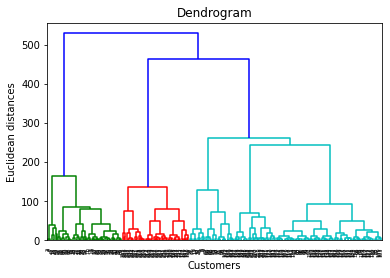

In [11]:
# Using the dendrogram to find optimal number of clusters
#A dendrogram is a diagram that shows the hierarchical relationship between objects
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
#ward is to minimize the variance of each cluster
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

- since graph shows three different coloured clusters , so k=3
- you can also chekc for longest verticla lines for identifying the same

In [13]:
# Fitting Hierarchical Clustering to our Data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2])

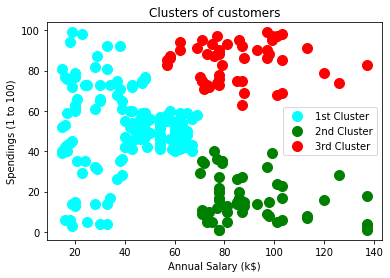

In [15]:
# Visualising the clusters and interpretation
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'cyan', label = '1st Cluster')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = '2nd Cluster')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = '3rd Cluster')
plt.title('Clusters of customers')
plt.xlabel('Annual Salary (k$)')
plt.ylabel('Spendings (1 to 100)')
plt.legend()
plt.show()
# just for my refernce : 0,1,2 are the clusters as is obvious , and the 0,1 are the axis numbers where 0=x ( for annual salary) , 1=y (for spendings)